California Housing price prediction using the given attributes(variables) and using Machine Learning Algorithms 

In [ ]:
# Importing the libraries
import numpy as np  # Linear algebra
import pandas as pd # Data Preprocessing CSV file, I/O (pd.read_csv)

In [ ]:
# Importing data using pandas library
# Pandas is a library used to import csv file.
import pandas as pd 
housing=pd.read_csv('/content/housing.csv')

In [ ]:
# Taking a brief look at the data set in CSV form
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# .info() gives us the data type and total number of non-null values.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Counting the categories in the columns ocean approximity.
# (Usually the location of the area matter in the price of housing because people prefer to live in the nicer location)
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis)

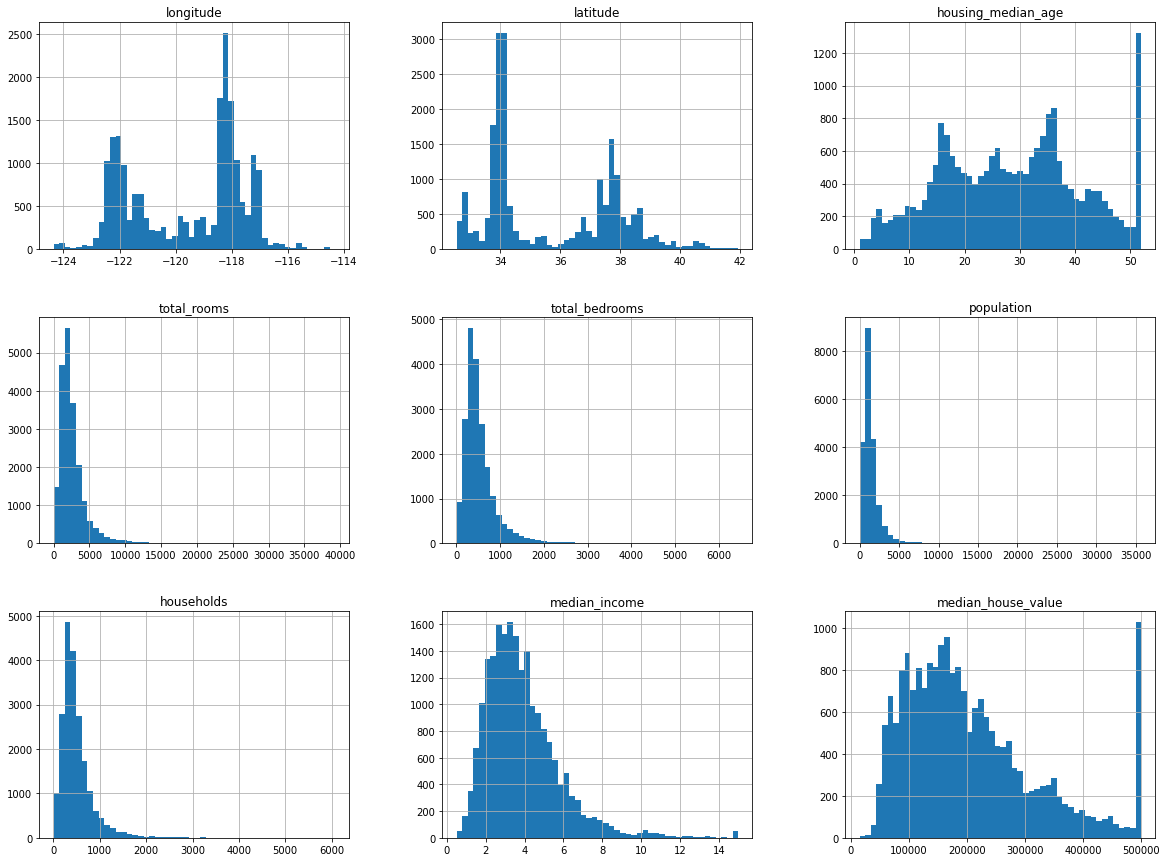

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

From the above histograms we can observe that housing median age and # Train test spliting the dataset.
ter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond $500,000, then you have two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
$500,000).
3. These attributes have very different scales. We will discuss this later in this chap‐
ter, when we explore feature scaling.
4. Finally, many histograms are tail-heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.


In [ ]:
# Train test spliting the dataset.
# test size is 0.2 means 20% of the data set.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
# Taking a look at median income histogram closly because it might be highly corelated to the housing value(People can only spend what they can earn).
# Changing the name of the median_income to income_cat to not get confused
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

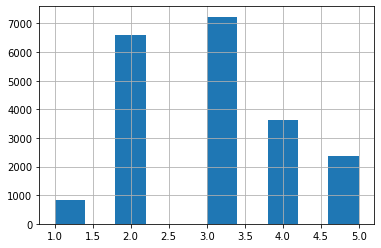

In [ ]:
# Veiwing median income variable using histogram.
housing["income_cat"].hist()
# It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata(Homogeneus group), and each stratum should be large enough

Stratified shuffle split is stratifing the group into homogeneus subgroup so that  called strata, and the right
number of instances are sampled from each stratum to guarantee that the test set is
representative of the overall population.

In [ ]:
# importing the stratified sample split from sklearn library.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [ ]:
# Now we are removing income_cat attribute so the data is back to its original state.
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

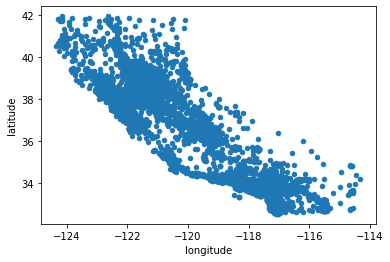

In [ ]:
# Plot housing data set.
housing.plot(kind="scatter", x="longitude", y="latitude")

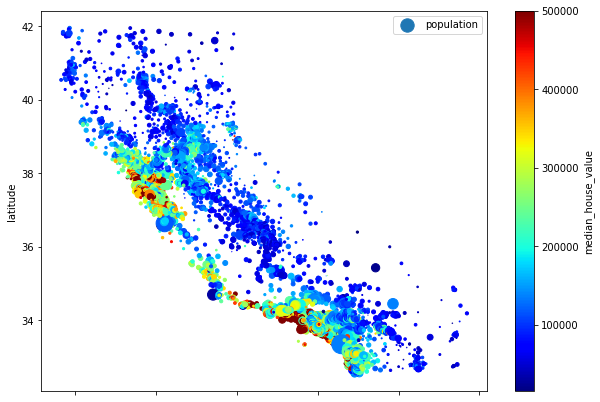

In [ ]:
# Through this we can find the densely populated area because density of population and housing price are correlated not corelated actually cause the prices to go up.
# Because of the supply and demand. 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa398ac4150>,
      dtype=object)

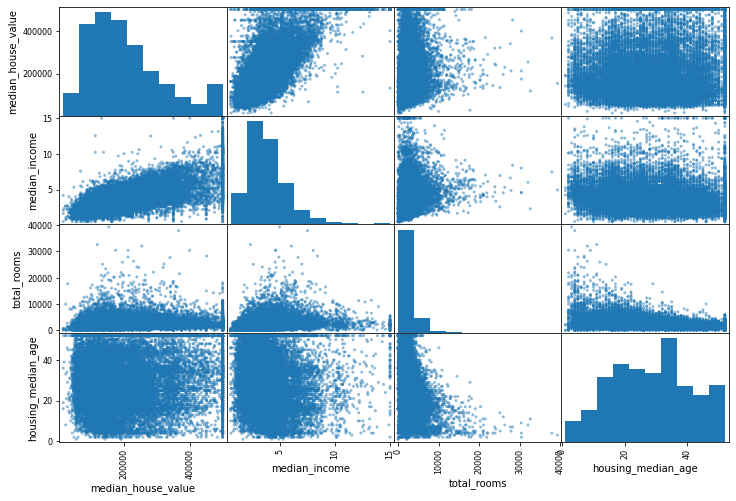

In [ ]:
# By using the scatter matrix we can find which of the attributes are highly correlated.
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
# Finding the correlation matrix 
corr_matrix = housing.corr()

In [ ]:
# Finding the correaltion between Median house income and all other attributes because it is the goal. 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa399ecbd50>,
      dtype=object)

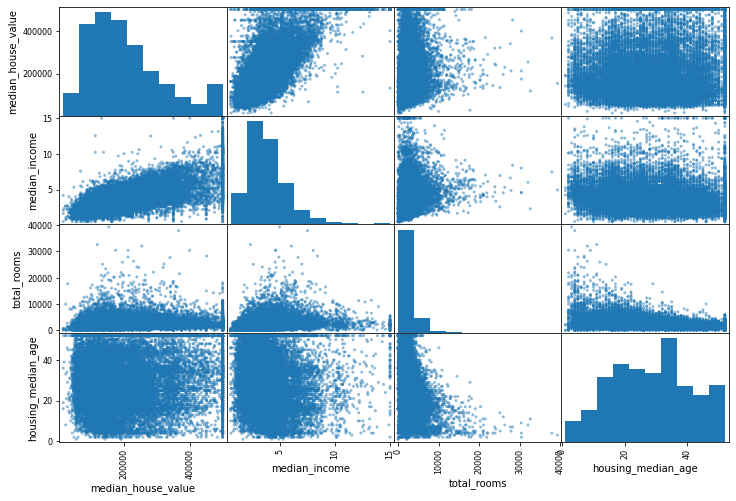

In [ ]:
# Visualizing the correlation of the attributes 'Median_house_value',median_income,'total_rooms','housing_median_age'
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


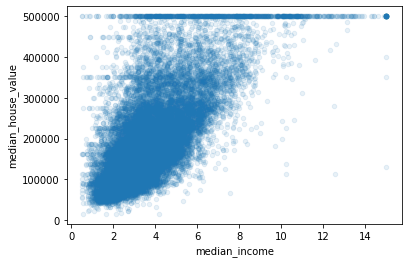

In [ ]:
# Ploting median_income and median_house_value because they seem highly correlated.
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [ ]:
# Creating some meaning full attributes because we know intutively that those attributes are directly correlated to the median_house_value.
# Rather than number of rooms in a district, Number of bedrooms,popluation.
# So applying demand and supply principal to those attributes to make it meaning full.
# rooms_per_houshold= If there are more number of house holds in that perticular area then the required number of rooms increases.
# bedrooms_per_room= We can rent out bedrooms (Air BNB) living rooms and kitchen are not so valueble because because we cannot rent them seperatly.
# population_per_household = To find out the population density.
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

After adding meaning full attributes to the data set i.e usefull find out what's going on with median_house_value.

In [ ]:
# function for finding correlation between target attribute and all other attributes.
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Preparing Data for the machine learning algorithms

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Until now we exploited the data found out the mainpoints in the data to manupulate.

Now preparing the Data for Machine Learning Algorithms

Data Cleaning
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).


In [ ]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)
#“trained” imputer to transform the training set by replacing missing values with the learned medians.

In [ ]:
# The result is a plain NumPy array containing the transformed features.Puting it back into a pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
 index=housing_num.index)


Handling Text and Categorical Attributes

We use encoders to convert text data to numerical so that it can be used to feed into the Machine learnign algorithms.

In [ ]:
#  This attribute of the data is textual so we are using one hot encoder to convert it into numerical.
# The special feature of the one hot encoder is to convert it only converts the required variable to 1 which positive in the boolean algebra and makes it easy for machine learnign algorithm
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
# One Hot Encoding is a technique for representing categorical variables as binary vectors.
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

There are transformers in sci-kit learn library for many of the transformers but but there is no transfomer in sci-kit learn library to add or combine all the usefull attributes so we create our own transformer using OPP in python. To combine all of them.
Transformer=>Which transforms data into something Machine Learning algorithm can understand.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
# Combined all the attributes.
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Feature Scaling


One of the most important transformations you need to apply to your data is feature
scaling.
Feature scaling is scaling the features as per required quantity.
Best Analogy: If there is leamonade stand, the have 1000 lemons, 1000grams of sugar, 1000ml of water they can't combine all of them to make lemonade but they need to scale them to get a perfect taste.(Unrelated to the dataset we are dealign but this is the clear analogy i can find to explain feature scaling.)
 

Two most common scaling techniques 1)MinMax Scaler(Normalization) and
Standardization. 
we are using standard scaling here.

Transformation Pipelines

In [ ]:
# Numpipeline creating a pipeline required to change textual values into numerical values.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num) # housing_num was all the numerical column dataset.
# housing_num_tr is after adding all the transformation techniques to the numerical data excluding ocean proximity which is the textual data.


In [ ]:
from sklearn.compose import ColumnTransformer# using transformer to transform all the columns.
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared
# As we can see the csv data we got is transformed into arrays of number to feed to machine learning algorithms.

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

Select and Train a Model


The Main problem required for course work start from here.

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# we can see that error is very high.
# Overfitting: Good performance on the training data, poor generliazation to other data.

68627.87390018745

Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# we can see that error is very low.
# This means the data is overfitting.
# Underfitting: Poor performance on the training data and poor generalization to other data\


0.0

One way to evaluate decision tree model is to train_test_split() into a  smaller training set and validation set 



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [71946.06902046 71936.14404298 68189.09668541 71707.16151485
 71002.50495007 76669.83747375 71219.2282004  74582.91008485
 68393.8395373  71844.40309449]
Mean: 71749.1194604567
Standard deviation: 2389.5255874178615


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180607


In [ ]:
# Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further.
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
#Now that the model is trained, let’s evaluate it on the training set:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
display_scores(forest_rmse)

Scores: 18619.0733782131
Mean: 18619.0733782131
Standard deviation: 0.0


Finetuning the Model

Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
# Grid search is the simplest algorithm for hyperparameter tuning.
# Basically, we divide the domain of the hyperparameters into a discrete grid. 
# Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation.
# The point of the grid that maximizes the average value in cross-validation, is the optimal combination of values for the hyperparameters.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_
#we got best parameters to choose for our model. 


{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_
# Random search best model so we are fitting in best parameters in it.

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)
# 

63199.44343824893 {'max_features': 2, 'n_estimators': 3}
55776.7280926022 {'max_features': 2, 'n_estimators': 10}
52622.2553996777 {'max_features': 2, 'n_estimators': 30}
59959.313910454766 {'max_features': 4, 'n_estimators': 3}
52628.689977177084 {'max_features': 4, 'n_estimators': 10}
50875.84918855595 {'max_features': 4, 'n_estimators': 30}
59875.37356327205 {'max_features': 6, 'n_estimators': 3}
52075.93853451653 {'max_features': 6, 'n_estimators': 10}
50239.0765797617 {'max_features': 6, 'n_estimators': 30}
58448.23562836372 {'max_features': 8, 'n_estimators': 3}
52100.35258019116 {'max_features': 8, 'n_estimators': 10}
49986.81988280547 {'max_features': 8, 'n_estimators': 30}
64026.76191541209 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54333.27625278829 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60343.45225241054 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52481.82941800123 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.48626862e-02, 6.77056561e-02, 4.07821900e-02, 1.48185844e-02,
       1.49461122e-02, 1.48065912e-02, 1.40044035e-02, 3.55951739e-01,
       5.33874231e-02, 1.14134003e-01, 5.71780986e-02, 7.42368260e-03,
       1.65550419e-01, 8.78986805e-05, 1.50496446e-03, 2.85554755e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3559517386386327, 'median_income'),
 (0.16555041944024934, 'INLAND'),
 (0.11413400326323582, 'pop_per_hhold'),
 (0.07486268624210558, 'longitude'),
 (0.06770565612838117, 'latitude'),
 (0.05717809864617561, 'bedrooms_per_room'),
 (0.05338742310757989, 'rooms_per_hhold'),
 (0.04078218995997906, 'housing_median_age'),
 (0.014946112166972645, 'total_bedrooms'),
 (0.01481858443743139, 'total_rooms'),
 (0.014806591185822065, 'population'),
 (0.014004403495116547, 'households'),
 (0.007423682601885876, '<1H OCEAN'),
 (0.0028555475501809715, 'NEAR OCEAN'),
 (0.0015049644557278141, 'NEAR BAY'),
 (8.789868052343485e-05, 'ISLAND')]

Analyze the best models and their errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.48626862e-02, 6.77056561e-02, 4.07821900e-02, 1.48185844e-02,
       1.49461122e-02, 1.48065912e-02, 1.40044035e-02, 3.55951739e-01,
       5.33874231e-02, 1.14134003e-01, 5.71780986e-02, 7.42368260e-03,
       1.65550419e-01, 8.78986805e-05, 1.50496446e-03, 2.85554755e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.3559517386386327, 'median_income'),
 (0.16555041944024934, 'INLAND'),
 (0.11413400326323582, 'pop_per_hhold'),
 (0.07486268624210558, 'longitude'),
 (0.06770565612838117, 'latitude'),
 (0.05717809864617561, 'bedrooms_per_room'),
 (0.05338742310757989, 'rooms_per_hhold'),
 (0.04078218995997906, 'housing_median_age'),
 (0.014946112166972645, 'total_bedrooms'),
 (0.01481858443743139, 'total_rooms'),
 (0.014806591185822065, 'population'),
 (0.014004403495116547, 'households'),
 (0.007423682601885876, '<1H OCEAN'),
 (0.0028555475501809715, 'NEAR OCEAN'),
 (0.0015049644557278141, 'NEAR BAY'),
 (8.789868052343485e-05, 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2
print(final_rmse)

48257.545551419076


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46256.42313005, 50178.92709603])